In [136]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [30]:
r=open("logins.json")
data=json.load(r)

In [59]:
df=pd.DataFrame(pd.Series(q['login_time']),columns=['login_time'])
df['login_time']=pd.to_datetime(df['login_time'])

In [151]:
df.tail(5)

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [61]:
print(df.describe(datetime_is_numeric=True))

                          login_time
count                          93142
mean   1970-02-26 19:09:39.779648247
min              1970-01-01 20:12:16
25%       1970-02-04 10:37:19.750000
50%       1970-03-01 06:33:05.500000
75%       1970-03-22 04:01:10.750000
max              1970-04-13 18:57:38


<AxesSubplot:xlabel='login_time'>

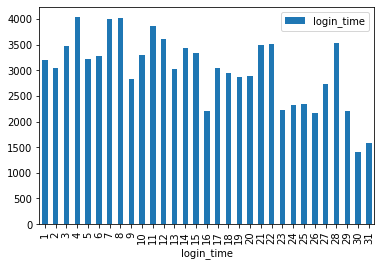

In [71]:
df.groupby(df['login_time'].dt.day).count().plot(kind="bar")

<AxesSubplot:xlabel='login_time'>

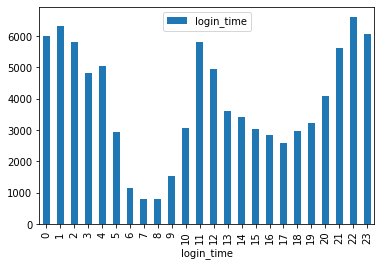

In [72]:
df.groupby(df['login_time'].dt.hour).count().plot(kind="bar")

In [211]:
df['hours']=df['login_time'].dt.hour

In [212]:
df['minutes']=df['login_time'].dt.minute

In [213]:
df['total_minutes']=df['hours']*60+df['minutes']

In [217]:
df['day']=df['login_time'].dt.day

In [218]:
df.head()

,login_time,hours,minutes,total_minutes,day
0,1970-01-01 20:13:18,20,13,1213,1
1,1970-01-01 20:16:10,20,16,1216,1
2,1970-01-01 20:16:37,20,16,1216,1
3,1970-01-01 20:16:36,20,16,1216,1
4,1970-01-01 20:26:21,20,26,1226,1


In [ ]:
minutes=np.linspace(0,1440,96)
minutes=[int(i) for i in minutes]

In [247]:
counts=[0,1439]
for i in range(1,len(minutes)-1):
    j=i+1
    previous_rolling_period=df.groupby(df['total_minutes']).count().drop(columns=['hours','minutes','day']).rolling(minutes[i]).sum()['login_time'][minutes[i]-1]
    rolling_period=df.groupby(df['total_minutes']).count().drop(columns=['hours','minutes','day']).rolling(minutes[j]).sum()['login_time'][minutes[j]-1]
    rolling_sum=rolling_period-previous_rolling_period
    counts.append(rolling_sum)

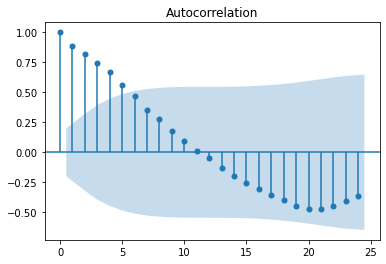

In [262]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(counts, lags=24)
plt.show()

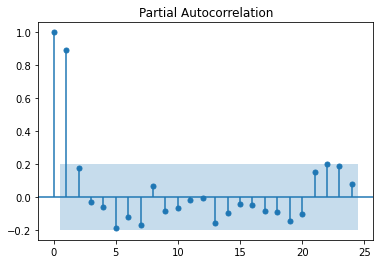

In [255]:
fig = tsaplots.plot_pacf(counts, lags=24)

In [259]:
ts_df=pd.DataFrame({'col1':minutes,'col2':counts})
ts_df=ts_df.set_index('col1')

<AxesSubplot:xlabel='col1'>

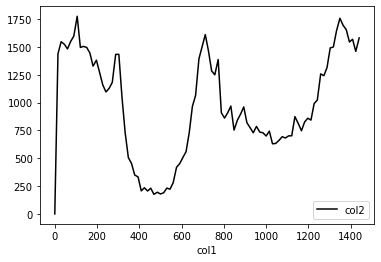

In [264]:
ts_df.plot(colormap='cubehelix')

Based on the time series for daily login times, the process looks stationary.

# Experiment and Metrics Design

<b>Q1:</b> What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

<b>A:</b> The cost of the toll should be within the limits of the range that drivers are willing to spend to afford the bridge cost, depending on their revenue, mileage, etc. 

<b>Q2:</b> Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:


<b>a)</b> how you will implement the experiment

<b>a)</b> Assuming the data has costs per driving partner for maintaining their relationship to the managers of the city, a one-sided confidence interval test should be used to calculate the likeliness of observations outside the range of the drivers affordability range.

<b>b)</b> what statistical test(s) you will conduct to verify the significance of the
observation


<b>b)</b> Use the t-test for the difference between means, where the pooled standard deviation of the two groups is given by: 
and the t-test statistic is then given by:

Assume the variances are independent and follow the same distribution.

Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from scipy.stats (hint, you're looking for a function to perform a t-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

The null hypothesis is that the group who paid the toll and those that didn't have the same Return on Revenue. The alternative hypothesis is that they don't

<b>c)</b> how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


<b>c)</b> Based on the critical value and the relevant 95% confidence interval for the mean, we can comment on whether the managers should be concerned.

Based on our confidence interval if the lower limit above the minimum amount drivers are willing to spend then we should initiate enhancements to the bridge. However, if the lower limit is below the minimum amount drivers are willing to spend the manager should be concerned.

# Predictive Modeling

In [325]:
r=open("ultimate_data_challenge.json")
data=json.load(r)

In [348]:
data[0].keys()

dict_keys(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])

In [327]:
df = pd.json_normalize(data)

In [328]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [329]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [334]:
df['phone'].fillna(df['phone'].value_counts().idxmax(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)

In [335]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [337]:
df['signup_date']=pd.to_datetime(df['signup_date'])
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])

In [362]:
df['user_retained']=0

In [363]:
index=df[df['last_trip_date'].dt.month >=6].index

In [364]:
df['user_retained'].iloc[index]=1

C:\Users\rohan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [367]:
df['user_retained'].value_counts(normalize=True)

0    0.62392
1    0.37608
Name: user_retained, dtype: float64

According to the above 37.6% of users were retained.

In [368]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
user_retained                      int64
dtype: object

In [372]:
from sklearn import preprocessing 
#make an instance of Label Encoder

In [373]:
label_encoder = preprocessing.LabelEncoder()
df["city"] = label_encoder.fit_transform(df["city"])
df["phone"] = label_encoder.fit_transform(df["phone"])
df["ultimate_black_user"] = label_encoder.fit_transform(df['ultimate_black_user'])
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_retained
0,1,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0,1
1,0,0,2014-01-29,5.0,1.00,2014-05-05,0,0.0,0,50.0,8.26,5.0,0
2,0,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0,0
3,1,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9,1
4,2,14,2014-01-27,4.4,1.19,2014-03-15,0,11.8,0,82.4,3.13,4.9,0


In [377]:
df = df.drop(['signup_date','last_trip_date'],axis =1)

In [379]:
print(df.nunique())

city                         3
trips_in_first_30_days      59
avg_rating_of_driver        38
avg_surge                  115
phone                        2
surge_pct                  367
ultimate_black_user          2
weekday_pct                666
avg_dist                  2908
avg_rating_by_driver        28
user_retained                2
dtype: int64


In [380]:
print(df.nunique()/df.shape[0])

city                      0.00006
trips_in_first_30_days    0.00118
avg_rating_of_driver      0.00076
avg_surge                 0.00230
phone                     0.00004
surge_pct                 0.00734
ultimate_black_user       0.00004
weekday_pct               0.01332
avg_dist                  0.05816
avg_rating_by_driver      0.00056
user_retained             0.00004
dtype: float64


<AxesSubplot:>

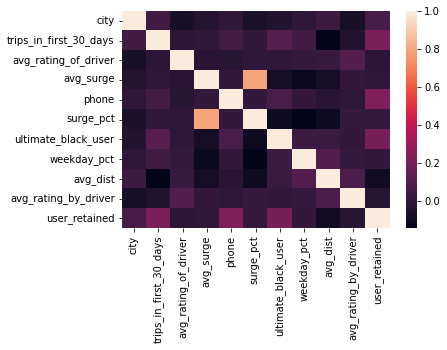

In [381]:
sns.heatmap(df.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x254e5676a90>,
 'caps': [<matplotlib.lines.Line2D at 0x254e5681278>,
 'boxes': [<matplotlib.lines.Line2D at 0x254e5676710>],
 'medians': [<matplotlib.lines.Line2D at 0x254e5681a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x254e5681e48>],
 'means': []}

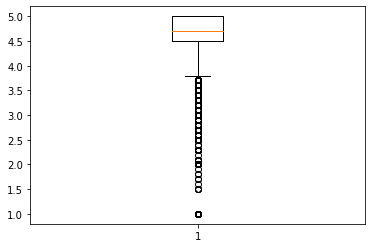

In [382]:
plt.boxplot(df['avg_rating_of_driver'])

{'whiskers': [<matplotlib.lines.Line2D at 0x254e9e1c0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x254e9e1c8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x254e9e10dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x254e9e6a0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x254e9e6a4e0>],
 'means': []}

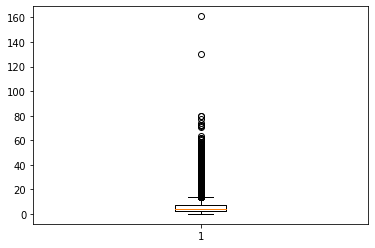

In [384]:
plt.boxplot(df['avg_dist'])

In [387]:
features=df.drop(columns=['user_retained'],axis=1).columns
X=df[features]
# X=features
y=df['user_retained']

In [389]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [390]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [391]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [392]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.754
Random Forest: f1-score=0.753


Ultimate can decide which users to target based on their predicted retention.